In [1]:
# Note: Basically lifted from this: https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html
# Clusterable data came from https://github.com/scikit-learn-contrib/hdbscan/blob/master/notebooks/clusterable_data.npy

In [2]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
import json
from geopandas import GeoSeries

import random

In [3]:
with open("../GeoJSON/labeled.geojson", "r") as f:
    features = json.load(f)
    gdf = gpd.GeoDataFrame.from_features(features)

In [4]:
from sklearn.datasets import make_blobs

 	391727.30 	142028.47 	38.946113 	-77.095431

In [5]:
synth_long = np.random.default_rng().uniform(-77.10644306, -76.91135603,2123)
synth_lat = np.random.default_rng().uniform(38.82094888, 38.98414603,2123)
 

In [6]:
X_2,y_2 = make_blobs(n_features=2,center_box = (-77.10644306, -76.91135603,2123), centers =20,n_samples=2130,
                     cluster_std=0.004, random_state=60)

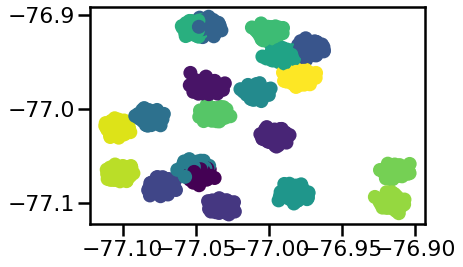

In [7]:
plt.scatter(X_2[:,0], X_2[:,1],c=y_2)

frame = plt.gca()

In [8]:
lat = X_2[:,0]
lon = X_2[:,1]

In [9]:
lon.min() 
# want lon.min to be higher than gdf.LONGTITUDE.min()

-77.11222950839996

In [10]:
lon.max()

-76.902145730069

In [11]:
gdf.LONGITUDE.min()

-77.10644306

In [12]:
gdf.LONGITUDE.max()

-76.91135603

In [13]:
lat.min()

-77.11193187140749

In [14]:
lat.max()

-76.90385909734846

In [15]:
gdf.LATITUDE.min()

38.82094888

In [16]:
gdf.LATITUDE.max()

38.98414603

In [17]:
# Need to shift 
lat_transform = lat - (lat.min()-gdf.LATITUDE.min())

In [18]:
lat_transform.max()

39.02902165405904

In [19]:
# What's the latitude of that    

In [20]:
# lat_transform = lat + (gdf.LATITUDE.max() - lat.max())

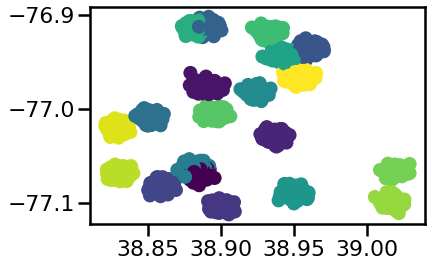

In [21]:
plt.scatter( lat_transform,lon, c= y_2)
frame = plt.gca()

In [22]:
with open("../GeoJSON/labeled.geojson", "r") as f:
    features = json.load(f)
    gdf = gpd.GeoDataFrame.from_features(features)

In [23]:
#Conver to df
import pandas as pd
df = pd.DataFrame(X_2, columns = ['LATITUDE','synth_LONGITUDE'])

In [24]:
df

,LATITUDE,synth_LONGITUDE
0,-77.027599,-77.104171
1,-76.923568,-77.101177
2,-77.042394,-76.918976
3,-76.912724,-77.063436
4,-77.053098,-77.071536
...,...,...
2125,-76.982444,-77.090009
2126,-77.035357,-77.099626
2127,-77.038272,-77.007936
2128,-77.036326,-76.907788


In [25]:
df = pd.concat([df,pd.DataFrame(lat_transform, columns = ['synth_LATITUDE'])], axis = 1)

In [26]:
df = pd.concat([df,pd.DataFrame(y_2, columns = ['synth_labels'])], axis = 1)

In [27]:
df

,LATITUDE,synth_LONGITUDE,synth_LATITUDE,synth_labels
0,-77.027599,-77.104171,38.905282,3
1,-76.923568,-77.101177,39.009313,16
2,-77.042394,-76.918976,38.890487,6
3,-76.912724,-77.063436,39.020157,15
4,-77.053098,-77.071536,38.879783,0
...,...,...,...,...
2125,-76.982444,-77.090009,38.950437,10
2126,-77.035357,-77.099626,38.897524,3
2127,-77.038272,-77.007936,38.894609,14
2128,-77.036326,-76.907788,38.896555,6


In [28]:
gdf

,geometry,ADDRESS,CLASS,LATITUDE,LONGITUDE,OBJECTID,TOTAL_CAPACITY,TRADE_NAME,TYPE,WARD,ZIPCODE,domain_max,domain_min,labels
0,POINT (-77.09543 38.94611),4822 YUMA ST NW,C,38.946113,-77.095431,65,199.0,Decarlos Restaurant,Restaurant,Ward 3,20016,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[-1, 0, -1, 9, -1, -1]"
1,POINT (-77.00277 38.88943),201 EAST CAPITOL ST SE,C,38.889433,-77.002768,66,NaN,Folger Shakespeare Library,Multipurpose,Ward 6,20003,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, -1, -1, -1, -1, -1]"
2,POINT (-77.04406 38.90118),1912 I ST NW,C,38.901179,-77.044055,67,96.0,Chalin's Restaurant,Restaurant,Ward 2,20006,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, 1, 39, 190, 60, 50]"
3,POINT (-77.06131 38.90499),3100 M ST NW,A,38.904991,-77.061314,68,NaN,Potomac Wines And Spirits,Retail - Liquor Store,Ward 2,20007,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, 2, 34, 150, 40, 46]"
4,POINT (-77.02360 38.92940),3108 GEORGIA AVE NW,B,38.929398,-77.023599,69,NaN,Kusa Market,Retail - Grocery,Ward 1,20010,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, 3, 21, 83, 31, 33]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,POINT (-77.01110 38.89681),525 NEW JERSEY AVE NW,C,38.896810,-77.011099,2126,14.0,Hilton Washington DC Capitol Hill,Hotel,Ward 6,20001,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, 27, 27, 89, 35, 39]"
2119,POINT (-77.04185 38.91524),1836 18TH ST NW,C,38.915245,-77.041853,2127,96.0,TBD,Restaurant,Ward 2,20009,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, 7, 32, 113, 41, 47]"
2120,POINT (-77.06053 38.90543),3057 M ST NW,C,38.905430,-77.060526,2128,80.0,Amigo Mio,Restaurant,Ward 2,20007,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, 2, 34, -1, 40, 46]"
2121,POINT (-77.05033 38.90415),1118 23rd ST NW,C,38.904152,-77.050330,2129,708.0,Imperfecto,Restaurant,Ward 2,20037,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, 1, 44, 170, 59, 50]"


In [29]:
import pandas as pd
import numpy as np
import json 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as cx
from shapely.geometry import Point

import sklearn.cluster as cluster
import hdbscan 

import gc

In [30]:
# Because JSON doesn't like numpy arrays, convert them to pandas int
# https://github.com/automl/SMAC3/issues/453


def myconverter(obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
#         elif isinstance(obj, datetime.datetime):
#             return obj.__str__()

In [31]:
df = df[0:2123]

In [32]:
df

,LATITUDE,synth_LONGITUDE,synth_LATITUDE,synth_labels
0,-77.027599,-77.104171,38.905282,3
1,-76.923568,-77.101177,39.009313,16
2,-77.042394,-76.918976,38.890487,6
3,-76.912724,-77.063436,39.020157,15
4,-77.053098,-77.071536,38.879783,0
...,...,...,...,...
2118,-76.982131,-76.965316,38.950749,19
2119,-77.105665,-77.066731,38.827216,17
2120,-77.054578,-76.915624,38.878303,12
2121,-76.911762,-77.062404,39.021118,15


In [33]:
df['synth_coordinates']=list(zip(*[df[c] for c in ["synth_LONGITUDE", "synth_LATITUDE"]]))

/var/folders/bn/d_48lmg97fd2w7mzhn_mrv7r0000gn/T/ipykernel_81897/4052656892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['synth_coordinates']=list(zip(*[df[c] for c in ["synth_LONGITUDE", "synth_LATITUDE"]]))


In [34]:
df = df.drop(columns="LATITUDE")

In [35]:
synth = pd.concat([gdf,df],axis=1)

In [36]:
synth = synth[0:2123]

In [37]:
synth

,geometry,ADDRESS,CLASS,LATITUDE,LONGITUDE,OBJECTID,TOTAL_CAPACITY,TRADE_NAME,TYPE,WARD,ZIPCODE,domain_max,domain_min,labels,synth_LONGITUDE,synth_LATITUDE,synth_labels,synth_coordinates
0,POINT (-77.09543 38.94611),4822 YUMA ST NW,C,38.946113,-77.095431,65,199.0,Decarlos Restaurant,Restaurant,Ward 3,20016,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[-1, 0, -1, 9, -1, -1]",-77.104171,38.905282,3,"(-77.10417074708286, 38.90528211772393)"
1,POINT (-77.00277 38.88943),201 EAST CAPITOL ST SE,C,38.889433,-77.002768,66,NaN,Folger Shakespeare Library,Multipurpose,Ward 6,20003,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, -1, -1, -1, -1, -1]",-77.101177,39.009313,16,"(-77.10117679298722, 39.009312606242545)"
2,POINT (-77.04406 38.90118),1912 I ST NW,C,38.901179,-77.044055,67,96.0,Chalin's Restaurant,Restaurant,Ward 2,20006,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, 1, 39, 190, 60, 50]",-76.918976,38.890487,6,"(-76.91897563981868, 38.89048720753232)"
3,POINT (-77.06131 38.90499),3100 M ST NW,A,38.904991,-77.061314,68,NaN,Potomac Wines And Spirits,Retail - Liquor Store,Ward 2,20007,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, 2, 34, 150, 40, 46]",-77.063436,39.020157,15,"(-77.06343586403904, 39.02015683236472)"
4,POINT (-77.02360 38.92940),3108 GEORGIA AVE NW,B,38.929398,-77.023599,69,NaN,Kusa Market,Retail - Grocery,Ward 1,20010,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, 3, 21, 83, 31, 33]",-77.071536,38.879783,0,"(-77.07153631883715, 38.87978290583585)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,POINT (-77.01110 38.89681),525 NEW JERSEY AVE NW,C,38.896810,-77.011099,2126,14.0,Hilton Washington DC Capitol Hill,Hotel,Ward 6,20001,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, 27, 27, 89, 35, 39]",-76.965316,38.950749,19,"(-76.96531629749245, 38.95074946769202)"
2119,POINT (-77.04185 38.91524),1836 18TH ST NW,C,38.915245,-77.041853,2127,96.0,TBD,Restaurant,Ward 2,20009,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, 7, 32, 113, 41, 47]",-77.066731,38.827216,17,"(-77.06673107083519, 38.82721589381258)"
2120,POINT (-77.06053 38.90543),3057 M ST NW,C,38.905430,-77.060526,2128,80.0,Amigo Mio,Restaurant,Ward 2,20007,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, 2, 34, -1, 40, 46]",-76.915624,38.878303,12,"(-76.91562392720364, 38.87830309643303)"
2121,POINT (-77.05033 38.90415),1118 23rd ST NW,C,38.904152,-77.050330,2129,708.0,Imperfecto,Restaurant,Ward 2,20037,"[10, 55, 47, 198, 65, 55]","[-1, -1, -1, -1, -1, -1]","[0, 1, 44, 170, 59, 50]",-77.062404,39.021118,15,"(-77.06240419600923, 39.02111849764049)"


In [38]:
# Copied from Generate_clusters
import pandas as pd
import numpy as np
import json 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as cx
from shapely.geometry import Point

import sklearn.cluster as cluster
import hdbscan 

import gc

In [39]:
# GEOM STUFF

# Number of kilometers in one radian
kms_per_radian = 6371.0088

# represent points consistently as (lat, lon)
coords = synth[['synth_LATITUDE', 'synth_LONGITUDE']].values

# Convert list of lat & lon to radians because scikit learn harversine needs radian
X = np.radians(coords)

In [40]:
simulation = ["DBSCAN","DBSCAN","HDBSCAN","HDBSCAN","Hybrid","Hybrid"]
min_samples = [10,5,3,2,1,1]
epsilon = [0.5,0.2,None,None,5,5]
min_cluster_size = [None,None,15,5,10,10]
sel_method = [None,None,None,None,'eom','leaf']

In [41]:
min_samples = 10
epsilon = 0.5


db1 = cluster.DBSCAN(eps=epsilon/kms_per_radian,
                     min_samples=min_samples,
                     algorithm='ball_tree',
                     metric='haversine').fit(X)

In [42]:
db1.labels_.min()

-1

In [43]:
min_samples = 5
epsilon = 0.2

db2 = cluster.DBSCAN(eps=epsilon/kms_per_radian,
                     min_samples=min_samples,
                     algorithm='ball_tree',
                     metric='haversine').fit(X)

In [44]:
db2.labels_.min()

-1

In [45]:
min_cluster_size = 15
min_samples = 3

hdb1 = hdbscan.HDBSCAN(algorithm = 'best',
                       min_cluster_size=min_cluster_size,
                       min_samples=min_samples,
                       metric='haversine').fit(coords)

In [46]:
hdb1.labels_.min()

-1

In [47]:
min_cluster_size = 5
min_samples = 2

hdb2 = hdbscan.HDBSCAN(algorithm = 'best',
                       min_cluster_size=min_cluster_size,
                       min_samples=min_samples,
                       metric='haversine').fit(coords)

In [48]:
hdb2.labels_.min()

-1

In [49]:
min_cluster_size = 10
min_samples = 5
epsilon = 1
sel_method = 'eom'

hybrid1 = hdbscan.HDBSCAN(algorithm = 'best',
                          min_cluster_size=min_cluster_size,
                          min_samples=min_samples,
                          metric='haversine',
                          cluster_selection_epsilon = epsilon/kms_per_radian,
                          cluster_selection_method = sel_method).fit(coords)

In [50]:
hybrid1.labels_.min()

-1

In [51]:
min_cluster_size = 10
min_samples = 1
epsilon = 5
sel_method = 'leaf'

hybrid2 = hdbscan.HDBSCAN(algorithm = 'best',
                          min_cluster_size=min_cluster_size,
                          min_samples=min_samples,
                          metric='haversine',
                          cluster_selection_epsilon = epsilon/kms_per_radian,
                          cluster_selection_method = sel_method).fit(coords)

In [52]:
# Define a color domain for d3
def color_domain(column):
    col_min = column.min()
    col_max = column.max()
    return col_min, col_max

In [53]:
color_domain(db1.labels_)

(-1, 17)

In [54]:
color_domain(db2.labels_)

(-1, 29)

In [55]:
domain_min, domain_max = [list(x) for x in zip(color_domain(db1.labels_), color_domain(db2.labels_),
                               color_domain(hdb1.labels_), color_domain(hdb2.labels_),
                               color_domain(hybrid1.labels_), color_domain(hybrid2.labels_))]

In [56]:
domain_min

[-1, -1, -1, -1, -1, -1]

In [57]:
domain_max

[17, 29, 17, 41, 17, 40]

In [58]:
synth['synth_labels_gen'] = [list(x) for x in zip(db1.labels_, db2.labels_,hdb1.labels_,hdb2.labels_,hybrid1.labels_,hybrid2.labels_)]

In [59]:
synth['synth_domain_min'] = [domain_min for i in synth.index]
synth['synth_domain_max'] = [domain_max for i in synth.index]

In [60]:
# Count the number of noise points
real_noise = []
for i in range(6):
    noise = pd.Series([item[i] for item in synth.labels]).value_counts()[-1]
    real_noise.append(noise)

In [61]:
### Count the number of noise points
synth_noise = []
for i in range(6):
    noise = pd.Series([item[i] for item in synth.synth_labels_gen]).value_counts()[-1]
    synth_noise.append(noise)

In [62]:
synth_noise

[9, 342, 7, 90, 13, 485]

In [63]:
synth["real_noise"] = synth.apply(lambda x: real_noise, axis=1)
synth["synth_noise"] = synth.apply(lambda x: synth_noise, axis=1)

In [64]:
synth

,geometry,ADDRESS,CLASS,LATITUDE,LONGITUDE,OBJECTID,TOTAL_CAPACITY,TRADE_NAME,TYPE,WARD,...,labels,synth_LONGITUDE,synth_LATITUDE,synth_labels,synth_coordinates,synth_labels_gen,synth_domain_min,synth_domain_max,real_noise,synth_noise
0,POINT (-77.09543 38.94611),4822 YUMA ST NW,C,38.946113,-77.095431,65,199.0,Decarlos Restaurant,Restaurant,Ward 3,...,"[-1, 0, -1, 9, -1, -1]",-77.104171,38.905282,3,"(-77.10417074708286, 38.90528211772393)","[0, 0, 9, 10, 9, 22]","[-1, -1, -1, -1, -1, -1]","[17, 29, 17, 41, 17, 40]","[180, 318, 366, 356, 419, 225]","[9, 342, 7, 90, 13, 485]"
1,POINT (-77.00277 38.88943),201 EAST CAPITOL ST SE,C,38.889433,-77.002768,66,NaN,Folger Shakespeare Library,Multipurpose,Ward 6,...,"[0, -1, -1, -1, -1, -1]",-77.101177,39.009313,16,"(-77.10117679298722, 39.009312606242545)","[1, -1, 0, -1, 1, -1]","[-1, -1, -1, -1, -1, -1]","[17, 29, 17, 41, 17, 40]","[180, 318, 366, 356, 419, 225]","[9, 342, 7, 90, 13, 485]"
2,POINT (-77.04406 38.90118),1912 I ST NW,C,38.901179,-77.044055,67,96.0,Chalin's Restaurant,Restaurant,Ward 2,...,"[0, 1, 39, 190, 60, 50]",-76.918976,38.890487,6,"(-76.91897563981868, 38.89048720753232)","[2, 1, 5, 6, 2, 33]","[-1, -1, -1, -1, -1, -1]","[17, 29, 17, 41, 17, 40]","[180, 318, 366, 356, 419, 225]","[9, 342, 7, 90, 13, 485]"
3,POINT (-77.06131 38.90499),3100 M ST NW,A,38.904991,-77.061314,68,NaN,Potomac Wines And Spirits,Retail - Liquor Store,Ward 2,...,"[0, 2, 34, 150, 40, 46]",-77.063436,39.020157,15,"(-77.06343586403904, 39.02015683236472)","[3, 2, 1, 35, 0, 0]","[-1, -1, -1, -1, -1, -1]","[17, 29, 17, 41, 17, 40]","[180, 318, 366, 356, 419, 225]","[9, 342, 7, 90, 13, 485]"
4,POINT (-77.02360 38.92940),3108 GEORGIA AVE NW,B,38.929398,-77.023599,69,NaN,Kusa Market,Retail - Grocery,Ward 1,...,"[0, 3, 21, 83, 31, 33]",-77.071536,38.879783,0,"(-77.07153631883715, 38.87978290583585)","[4, 3, 13, 15, 11, 38]","[-1, -1, -1, -1, -1, -1]","[17, 29, 17, 41, 17, 40]","[180, 318, 366, 356, 419, 225]","[9, 342, 7, 90, 13, 485]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,POINT (-77.01110 38.89681),525 NEW JERSEY AVE NW,C,38.896810,-77.011099,2126,14.0,Hilton Washington DC Capitol Hill,Hotel,Ward 6,...,"[0, 27, 27, 89, 35, 39]",-76.965316,38.950749,19,"(-76.96531629749245, 38.95074946769202)","[14, 13, 17, 9, 15, -1]","[-1, -1, -1, -1, -1, -1]","[17, 29, 17, 41, 17, 40]","[180, 318, 366, 356, 419, 225]","[9, 342, 7, 90, 13, 485]"
2119,POINT (-77.04185 38.91524),1836 18TH ST NW,C,38.915245,-77.041853,2127,96.0,TBD,Restaurant,Ward 2,...,"[0, 7, 32, 113, 41, 47]",-77.066731,38.827216,17,"(-77.06673107083519, 38.82721589381258)","[11, 9, 8, 4, 8, -1]","[-1, -1, -1, -1, -1, -1]","[17, 29, 17, 41, 17, 40]","[180, 318, 366, 356, 419, 225]","[9, 342, 7, 90, 13, 485]"
2120,POINT (-77.06053 38.90543),3057 M ST NW,C,38.905430,-77.060526,2128,80.0,Amigo Mio,Restaurant,Ward 2,...,"[0, 2, 34, -1, 40, 46]",-76.915624,38.878303,12,"(-76.91562392720364, 38.87830309643303)","[2, 1, 5, 6, 2, -1]","[-1, -1, -1, -1, -1, -1]","[17, 29, 17, 41, 17, 40]","[180, 318, 366, 356, 419, 225]","[9, 342, 7, 90, 13, 485]"
2121,POINT (-77.05033 38.90415),1118 23rd ST NW,C,38.904152,-77.050330,2129,708.0,Imperfecto,Restaurant,Ward 2,...,"[0, 1, 44, 170, 59, 50]",-77.062404,39.021118,15,"(-77.06240419600923, 39.02111849764049)","[3, 2, 1, 35, 0, 0]","[-1, -1, -1, -1, -1, -1]","[17, 29, 17, 41, 17, 40]","[180, 318, 366, 356, 419, 225]","[9, 342, 7, 90, 13, 485]"


In [65]:
simulation = ["DBSCAN","DBSCAN","HDBSCAN","HDBSCAN","Hybrid","Hybrid"]
min_samples = [10,5,3,2,1,1]
epsilon = [0.5,0.2,None,None,5,5]
min_cluster_size = [None,None,15,5,10,10]
sel_method = [None,None,None,None,'eom','leaf']

In [66]:
synth["simulation"] = synth.apply(lambda x: simulation, axis =1 )
synth["min_samples"] = synth.apply(lambda x: min_samples, axis=1)
synth["epsilon"] = synth.apply(lambda x: epsilon, axis=1)
synth["min_cluster_size"] = synth.apply(lambda x: min_cluster_size, axis=1)
synth["sel_method"] = synth.apply(lambda x: sel_method, axis=1)

In [67]:
synth.columns

Index(['geometry', 'ADDRESS', 'CLASS', 'LATITUDE', 'LONGITUDE', 'OBJECTID',
       'TOTAL_CAPACITY', 'TRADE_NAME', 'TYPE', 'WARD', 'ZIPCODE', 'domain_max',
       'domain_min', 'labels', 'synth_LONGITUDE', 'synth_LATITUDE',
       'synth_labels', 'synth_coordinates', 'synth_labels_gen',
       'synth_domain_min', 'synth_domain_max', 'real_noise', 'synth_noise',
       'simulation', 'min_samples', 'epsilon', 'min_cluster_size',
       'sel_method'],
      dtype='object')

In [68]:
Ward_num = []
for i in range(len(synth)): 
    Ward = synth.WARD[i].split(" ")[1]
    Ward_num.append(Ward);

In [69]:
synth= pd.concat([synth,pd.DataFrame(Ward_num, columns = ['Ward_num'])], axis = 1)

In [70]:
# Cannot use geopandas to_file because each row of labels is a list 


with open("../GeoJSON/synthetic_labeled.geojson", "w") as f:
    json.dump(synth.__geo_interface__, f, default=myconverter)

with open("../GeoJSON/synthetic_labeled.geojson", "r") as f:
    features = json.load(f)
    synth = gpd.GeoDataFrame.from_features(features)

In [71]:
synth

,geometry,ADDRESS,CLASS,LATITUDE,LONGITUDE,OBJECTID,TOTAL_CAPACITY,TRADE_NAME,TYPE,WARD,...,sel_method,simulation,synth_LATITUDE,synth_LONGITUDE,synth_coordinates,synth_domain_max,synth_domain_min,synth_labels,synth_labels_gen,synth_noise
0,POINT (-77.09543 38.94611),4822 YUMA ST NW,C,38.946113,-77.095431,65,199.0,Decarlos Restaurant,Restaurant,Ward 3,...,"[None, None, None, None, eom, leaf]","[DBSCAN, DBSCAN, HDBSCAN, HDBSCAN, Hybrid, Hyb...",38.905282,-77.104171,"[-77.10417074708286, 38.90528211772393]","[17, 29, 17, 41, 17, 40]","[-1, -1, -1, -1, -1, -1]",3,"[0, 0, 9, 10, 9, 22]","[9, 342, 7, 90, 13, 485]"
1,POINT (-77.00277 38.88943),201 EAST CAPITOL ST SE,C,38.889433,-77.002768,66,NaN,Folger Shakespeare Library,Multipurpose,Ward 6,...,"[None, None, None, None, eom, leaf]","[DBSCAN, DBSCAN, HDBSCAN, HDBSCAN, Hybrid, Hyb...",39.009313,-77.101177,"[-77.10117679298722, 39.009312606242545]","[17, 29, 17, 41, 17, 40]","[-1, -1, -1, -1, -1, -1]",16,"[1, -1, 0, -1, 1, -1]","[9, 342, 7, 90, 13, 485]"
2,POINT (-77.04406 38.90118),1912 I ST NW,C,38.901179,-77.044055,67,96.0,Chalin's Restaurant,Restaurant,Ward 2,...,"[None, None, None, None, eom, leaf]","[DBSCAN, DBSCAN, HDBSCAN, HDBSCAN, Hybrid, Hyb...",38.890487,-76.918976,"[-76.91897563981868, 38.89048720753232]","[17, 29, 17, 41, 17, 40]","[-1, -1, -1, -1, -1, -1]",6,"[2, 1, 5, 6, 2, 33]","[9, 342, 7, 90, 13, 485]"
3,POINT (-77.06131 38.90499),3100 M ST NW,A,38.904991,-77.061314,68,NaN,Potomac Wines And Spirits,Retail - Liquor Store,Ward 2,...,"[None, None, None, None, eom, leaf]","[DBSCAN, DBSCAN, HDBSCAN, HDBSCAN, Hybrid, Hyb...",39.020157,-77.063436,"[-77.06343586403904, 39.02015683236472]","[17, 29, 17, 41, 17, 40]","[-1, -1, -1, -1, -1, -1]",15,"[3, 2, 1, 35, 0, 0]","[9, 342, 7, 90, 13, 485]"
4,POINT (-77.02360 38.92940),3108 GEORGIA AVE NW,B,38.929398,-77.023599,69,NaN,Kusa Market,Retail - Grocery,Ward 1,...,"[None, None, None, None, eom, leaf]","[DBSCAN, DBSCAN, HDBSCAN, HDBSCAN, Hybrid, Hyb...",38.879783,-77.071536,"[-77.07153631883715, 38.87978290583585]","[17, 29, 17, 41, 17, 40]","[-1, -1, -1, -1, -1, -1]",0,"[4, 3, 13, 15, 11, 38]","[9, 342, 7, 90, 13, 485]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,POINT (-77.01110 38.89681),525 NEW JERSEY AVE NW,C,38.896810,-77.011099,2126,14.0,Hilton Washington DC Capitol Hill,Hotel,Ward 6,...,"[None, None, None, None, eom, leaf]","[DBSCAN, DBSCAN, HDBSCAN, HDBSCAN, Hybrid, Hyb...",38.950749,-76.965316,"[-76.96531629749245, 38.95074946769202]","[17, 29, 17, 41, 17, 40]","[-1, -1, -1, -1, -1, -1]",19,"[14, 13, 17, 9, 15, -1]","[9, 342, 7, 90, 13, 485]"
2119,POINT (-77.04185 38.91524),1836 18TH ST NW,C,38.915245,-77.041853,2127,96.0,TBD,Restaurant,Ward 2,...,"[None, None, None, None, eom, leaf]","[DBSCAN, DBSCAN, HDBSCAN, HDBSCAN, Hybrid, Hyb...",38.827216,-77.066731,"[-77.06673107083519, 38.82721589381258]","[17, 29, 17, 41, 17, 40]","[-1, -1, -1, -1, -1, -1]",17,"[11, 9, 8, 4, 8, -1]","[9, 342, 7, 90, 13, 485]"
2120,POINT (-77.06053 38.90543),3057 M ST NW,C,38.905430,-77.060526,2128,80.0,Amigo Mio,Restaurant,Ward 2,...,"[None, None, None, None, eom, leaf]","[DBSCAN, DBSCAN, HDBSCAN, HDBSCAN, Hybrid, Hyb...",38.878303,-76.915624,"[-76.91562392720364, 38.87830309643303]","[17, 29, 17, 41, 17, 40]","[-1, -1, -1, -1, -1, -1]",12,"[2, 1, 5, 6, 2, -1]","[9, 342, 7, 90, 13, 485]"
2121,POINT (-77.05033 38.90415),1118 23rd ST NW,C,38.904152,-77.050330,2129,708.0,Imperfecto,Restaurant,Ward 2,...,"[None, None, None, None, eom, leaf]","[DBSCAN, DBSCAN, HDBSCAN, HDBSCAN, Hybrid, Hyb...",39.021118,-77.062404,"[-77.06240419600923, 39.02111849764049]","[17, 29, 17, 41, 17, 40]","[-1, -1, -1, -1, -1, -1]",15,"[3, 2, 1, 35, 0, 0]","[9, 342, 7, 90, 13, 485]"
